In [5]:
!pip install pandas numpy matplotlib seaborn mplsoccer scikit-learn

In [9]:
import pandas as pd
import numpy as np

df = pd.read_csv('~/Desktop/xg_model.csv')

In [9]:
df.head()

,x,y,is_goal,period,Assisted,Zone,IndividualPlay,RegularPlay,LeftFoot,RightFoot,...,Volley,FastBreak,ThrowinSetPiece,Penalty,OneOnOne,KeyPass,DirectFreekick,OwnGoal,OtherBodyPart,DirectCorner
0,80.8,51.6,False,SecondHalf,True,Center,True,True,True,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,79.3,24.2,False,SecondHalf,True,Center,True,True,NaN,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,80.0,59.5,False,SecondHalf,True,Center,NaN,NaN,NaN,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,89.8,55.6,False,SecondHalf,True,Center,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,84.9,56.2,False,SecondHalf,True,Center,NaN,True,True,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df.shape

(8118, 25)

In [15]:
df.x.min()

np.float64(0.8)

In [17]:
df.x.max()

np.float64(99.6)

In [19]:
df.y.min()

np.float64(3.1)

In [21]:
df.y.max()

np.float64(99.6)

In [23]:
df.columns

Index(['x', 'y', 'is_goal', 'period', 'Assisted', 'Zone', 'IndividualPlay',
       'RegularPlay', 'LeftFoot', 'RightFoot', 'FromCorner', 'FirstTouch',
       'Head', 'BigChance', 'SetPiece', 'Volley', 'FastBreak',
       'ThrowinSetPiece', 'Penalty', 'OneOnOne', 'KeyPass', 'DirectFreekick',
       'OwnGoal', 'OtherBodyPart', 'DirectCorner'],
      dtype='object')

In [24]:
df.drop(['DirectFreekick', 'DirectCorner'], axis=1, inplace=True)

In [29]:
df.columns

Index(['x', 'y', 'is_goal', 'period', 'Assisted', 'Zone', 'IndividualPlay',
       'RegularPlay', 'LeftFoot', 'RightFoot', 'FromCorner', 'FirstTouch',
       'Head', 'BigChance', 'SetPiece', 'Volley', 'FastBreak',
       'ThrowinSetPiece', 'Penalty', 'OneOnOne', 'KeyPass', 'OwnGoal',
       'OtherBodyPart'],
      dtype='object')

In [31]:
df.OwnGoal.value_counts()

OwnGoal
True    27
Name: count, dtype: int64

In [33]:
df = df[df['OwnGoal'] !=True]

In [26]:
df.drop('OwnGoal', axis=1, inplace=True)

In [37]:
df.shape

(8091, 22)

In [43]:
df.is_goal.value_counts()

is_goal
False    7097
True      994
Name: count, dtype: int64

<Axes: xlabel='x', ylabel='y'>

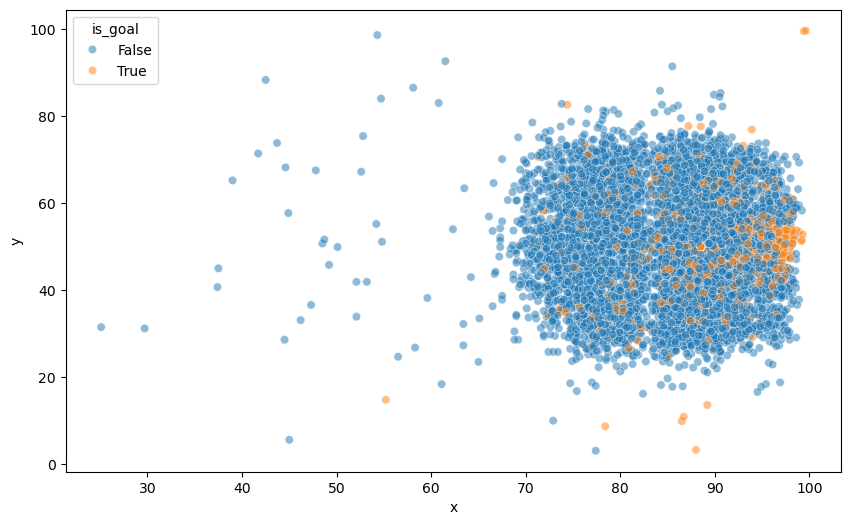

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))

sns.scatterplot(x='x', y='y', data=df, hue='is_goal', alpha=.5)

In [11]:
df.isna().sum()

x                     0
y                     0
is_goal               0
period                0
Assisted           2080
Zone                  0
IndividualPlay     5316
RegularPlay        2728
LeftFoot           5327
RightFoot          4124
FromCorner         6924
FirstTouch         4193
Head               6818
BigChance          6511
SetPiece           7725
Volley             7308
FastBreak          7502
ThrowinSetPiece    7930
Penalty            8012
OneOnOne           7917
KeyPass            8060
DirectFreekick     7887
OwnGoal            8091
OtherBodyPart      8085
DirectCorner       8116
dtype: int64

In [13]:
df.fillna(0, inplace=True)

In [15]:
df.dtypes

x                  float64
y                  float64
is_goal               bool
period              object
Assisted            object
Zone                object
IndividualPlay      object
RegularPlay         object
LeftFoot            object
RightFoot           object
FromCorner          object
FirstTouch          object
Head                object
BigChance           object
SetPiece            object
Volley              object
FastBreak           object
ThrowinSetPiece     object
Penalty             object
OneOnOne            object
KeyPass             object
DirectFreekick      object
OwnGoal             object
OtherBodyPart       object
DirectCorner        object
dtype: object

In [20]:
df = df.astype({
    'x': float,
    'y': float,
    'is_goal': bool,
    'period': str,
    'Assisted': bool,
    'Zone': str,
    'IndividualPlay': bool,
    'RegularPlay': bool,
    'LeftFoot': bool,
    'RightFoot': bool,
    'FromCorner': bool,
    'FirstTouch': bool,
    'Head': bool,
    'BigChance': bool,
    'SetPiece': bool,
    'Volley': bool,
    'FastBreak': bool,
    'ThrowinSetPiece': bool,
    'Penalty': bool,
    'OneOnOne': bool,
    'KeyPass': bool,
    'OtherBodyPart': bool
})

In [28]:
df.dtypes

x                  float64
y                  float64
is_goal               bool
period              object
Assisted              bool
Zone                object
IndividualPlay        bool
RegularPlay           bool
LeftFoot              bool
RightFoot             bool
FromCorner            bool
FirstTouch            bool
Head                  bool
BigChance             bool
SetPiece              bool
Volley                bool
FastBreak             bool
ThrowinSetPiece       bool
Penalty               bool
OneOnOne              bool
KeyPass               bool
OtherBodyPart         bool
dtype: object

In [32]:
df['shot_distance'] = np.sqrt((df['x'] - 100)**2 + (df['y'] - 50)**2)

In [34]:
df.shot_distance

0       19.266551
1       33.077636
2       22.141590
3       11.636151
4       16.323296
          ...    
8113    20.999048
8114     7.665507
8115    16.697305
8116    10.572133
8117    15.686937
Name: shot_distance, Length: 8118, dtype: float64

<Axes: >

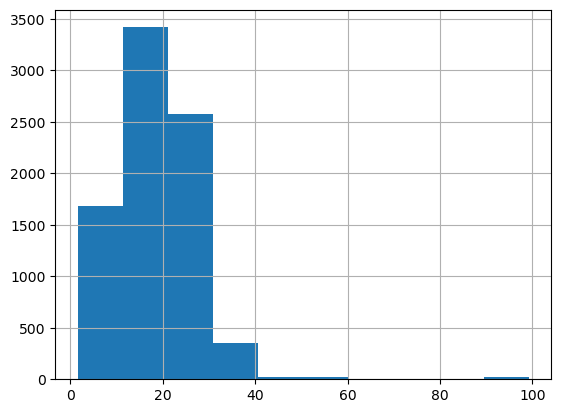

In [36]:
df['shot_distance'].hist()

In [40]:
df['shot_distance'].describe()

count    8118.000000
mean       18.750135
std         9.137534
min         1.581139
25%        12.090492
50%        18.413718
75%        24.268859
max        99.216329
Name: shot_distance, dtype: float64

In [45]:
df.period.value_counts()

period
SecondHalf    4347
FirstHalf     3771
Name: count, dtype: int64

In [49]:
df = pd.get_dummies(df, columns=['period', 'Zone'])

In [51]:
df.columns

Index(['x', 'y', 'is_goal', 'Assisted', 'IndividualPlay', 'RegularPlay',
       'LeftFoot', 'RightFoot', 'FromCorner', 'FirstTouch', 'Head',
       'BigChance', 'SetPiece', 'Volley', 'FastBreak', 'ThrowinSetPiece',
       'Penalty', 'OneOnOne', 'KeyPass', 'OtherBodyPart', 'shot_distance',
       'period_FirstHalf', 'period_SecondHalf', 'Zone_Back', 'Zone_Center',
       'Zone_Left', 'Zone_Right'],
      dtype='object')

In [58]:
df.period_FirstHalf.value_counts()

period_FirstHalf
False    4347
True     3771
Name: count, dtype: int64

In [60]:
df.period_SecondHalf.value_counts()

period_SecondHalf
True     4347
False    3771
Name: count, dtype: int64

In [67]:
X = df.drop('is_goal', axis=1)
y = df['is_goal']

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, roc_auc_score, brier_score_loss

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [75]:
model = LogisticRegression(max_iter=1000)

In [81]:
model.fit(X_train, y_train)

/Users/timberry/miniconda3/envs/ltws-env/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [83]:
y_pred_proba = model.predict_proba(X_test) [:, 1]

In [88]:
y_pred_proba[:10]

array([0.33245444, 0.05312539, 0.07824194, 0.06588469, 0.17324615,
       0.0322073 , 0.05050689, 0.10456037, 0.40594794, 0.28514366])

In [90]:
final_df = X_test.copy()
final_df['goal_probability'] = y_pred_proba

In [94]:
final_df.iloc[100]

x                         88.0
y                         51.7
Assisted                  True
IndividualPlay           False
RegularPlay              False
LeftFoot                 False
RightFoot                False
FromCorner               False
FirstTouch                True
Head                      True
BigChance                False
SetPiece                 False
Volley                   False
FastBreak                 True
ThrowinSetPiece          False
Penalty                  False
OneOnOne                 False
KeyPass                  False
OtherBodyPart            False
shot_distance        12.119818
period_FirstHalf         False
period_SecondHalf         True
Zone_Back                False
Zone_Center               True
Zone_Left                False
Zone_Right               False
goal_probability      0.040511
Name: 8038, dtype: object

In [99]:
final_df.sort_values(by='goal_probability', ascending=False).head()

,x,y,Assisted,IndividualPlay,RegularPlay,LeftFoot,RightFoot,FromCorner,FirstTouch,Head,...,KeyPass,OtherBodyPart,shot_distance,period_FirstHalf,period_SecondHalf,Zone_Back,Zone_Center,Zone_Left,Zone_Right,goal_probability
1323,88.5,50.0,False,False,False,True,False,False,False,False,...,False,False,11.5,False,True,False,True,False,False,0.823247
3978,88.5,50.0,False,False,False,True,False,False,False,False,...,False,False,11.5,False,True,False,True,False,False,0.823247
3862,88.5,50.0,False,False,False,True,False,False,False,False,...,False,False,11.5,False,True,False,True,False,False,0.823247
3527,88.5,50.0,False,False,False,True,False,False,False,False,...,False,False,11.5,False,True,False,True,False,False,0.823247
381,88.5,50.0,False,False,False,True,False,False,False,False,...,False,False,11.5,False,True,False,True,False,False,0.823247


In [101]:
log_loss(y_test, y_pred_proba)

0.28371937483319165

In [103]:
roc_auc_score(y_test, y_pred_proba)
#Should be a str

np.float64(0.7914523920835281)

In [108]:
brier_score_loss(y_test, y_pred_proba)
#Should be a str

np.float64(0.08168600793405371)

In [110]:
from mplsoccer import Pitch
pitch = Pitch(pitch_type='opta')

In [118]:
from matplotlib.colors import LinearSegmentedColormap
colors = ['red', 'yellow', 'green']
cmap = LinearSegmentedColormap.from_list('my_colormap', colors)

NameError: name 'plt' is not defined

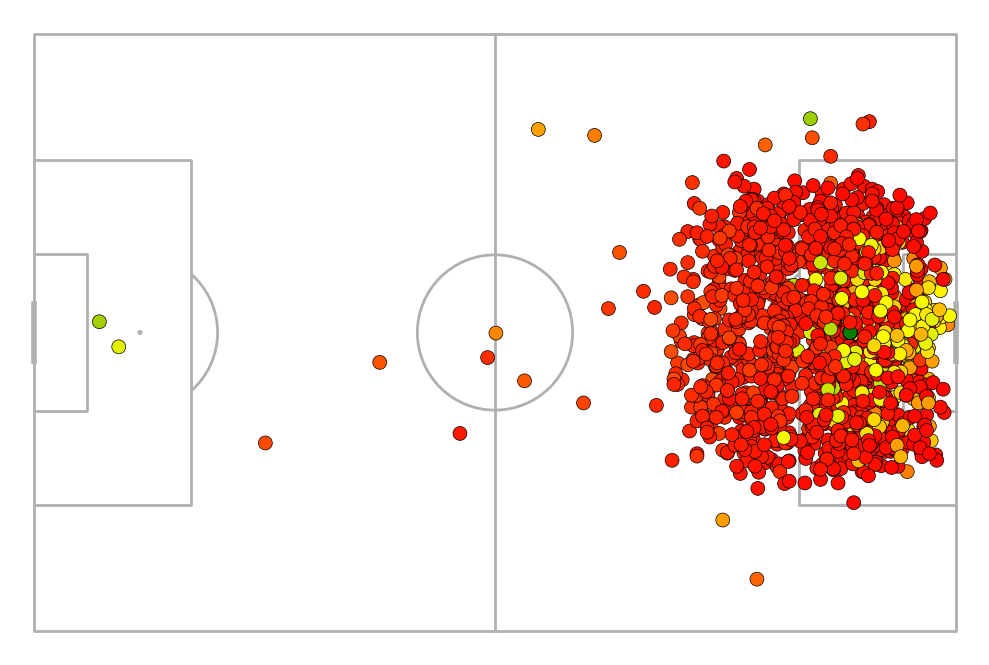

In [126]:
fig, ax = pitch.draw(figsize=(10, 8))

sc = pitch.scatter(
    final_df['x'],
    final_df['y'],
    c=final_df['goal_probability'],
    cmap=cmap,
    edgecolors='black',
    linewidth=.5,
    s=100,
    ax=ax
)

cbar = plt.colorbar(sc, ax=ax, orientation='vertical', fraction=.02, pad=.02)
cbar.set_label('xG Probability')